In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('monthly_milk_production.csv', index_col='Date',parse_dates=True)
data.index.freq = 'MS'

In [3]:
data

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


<Axes: xlabel='Date'>

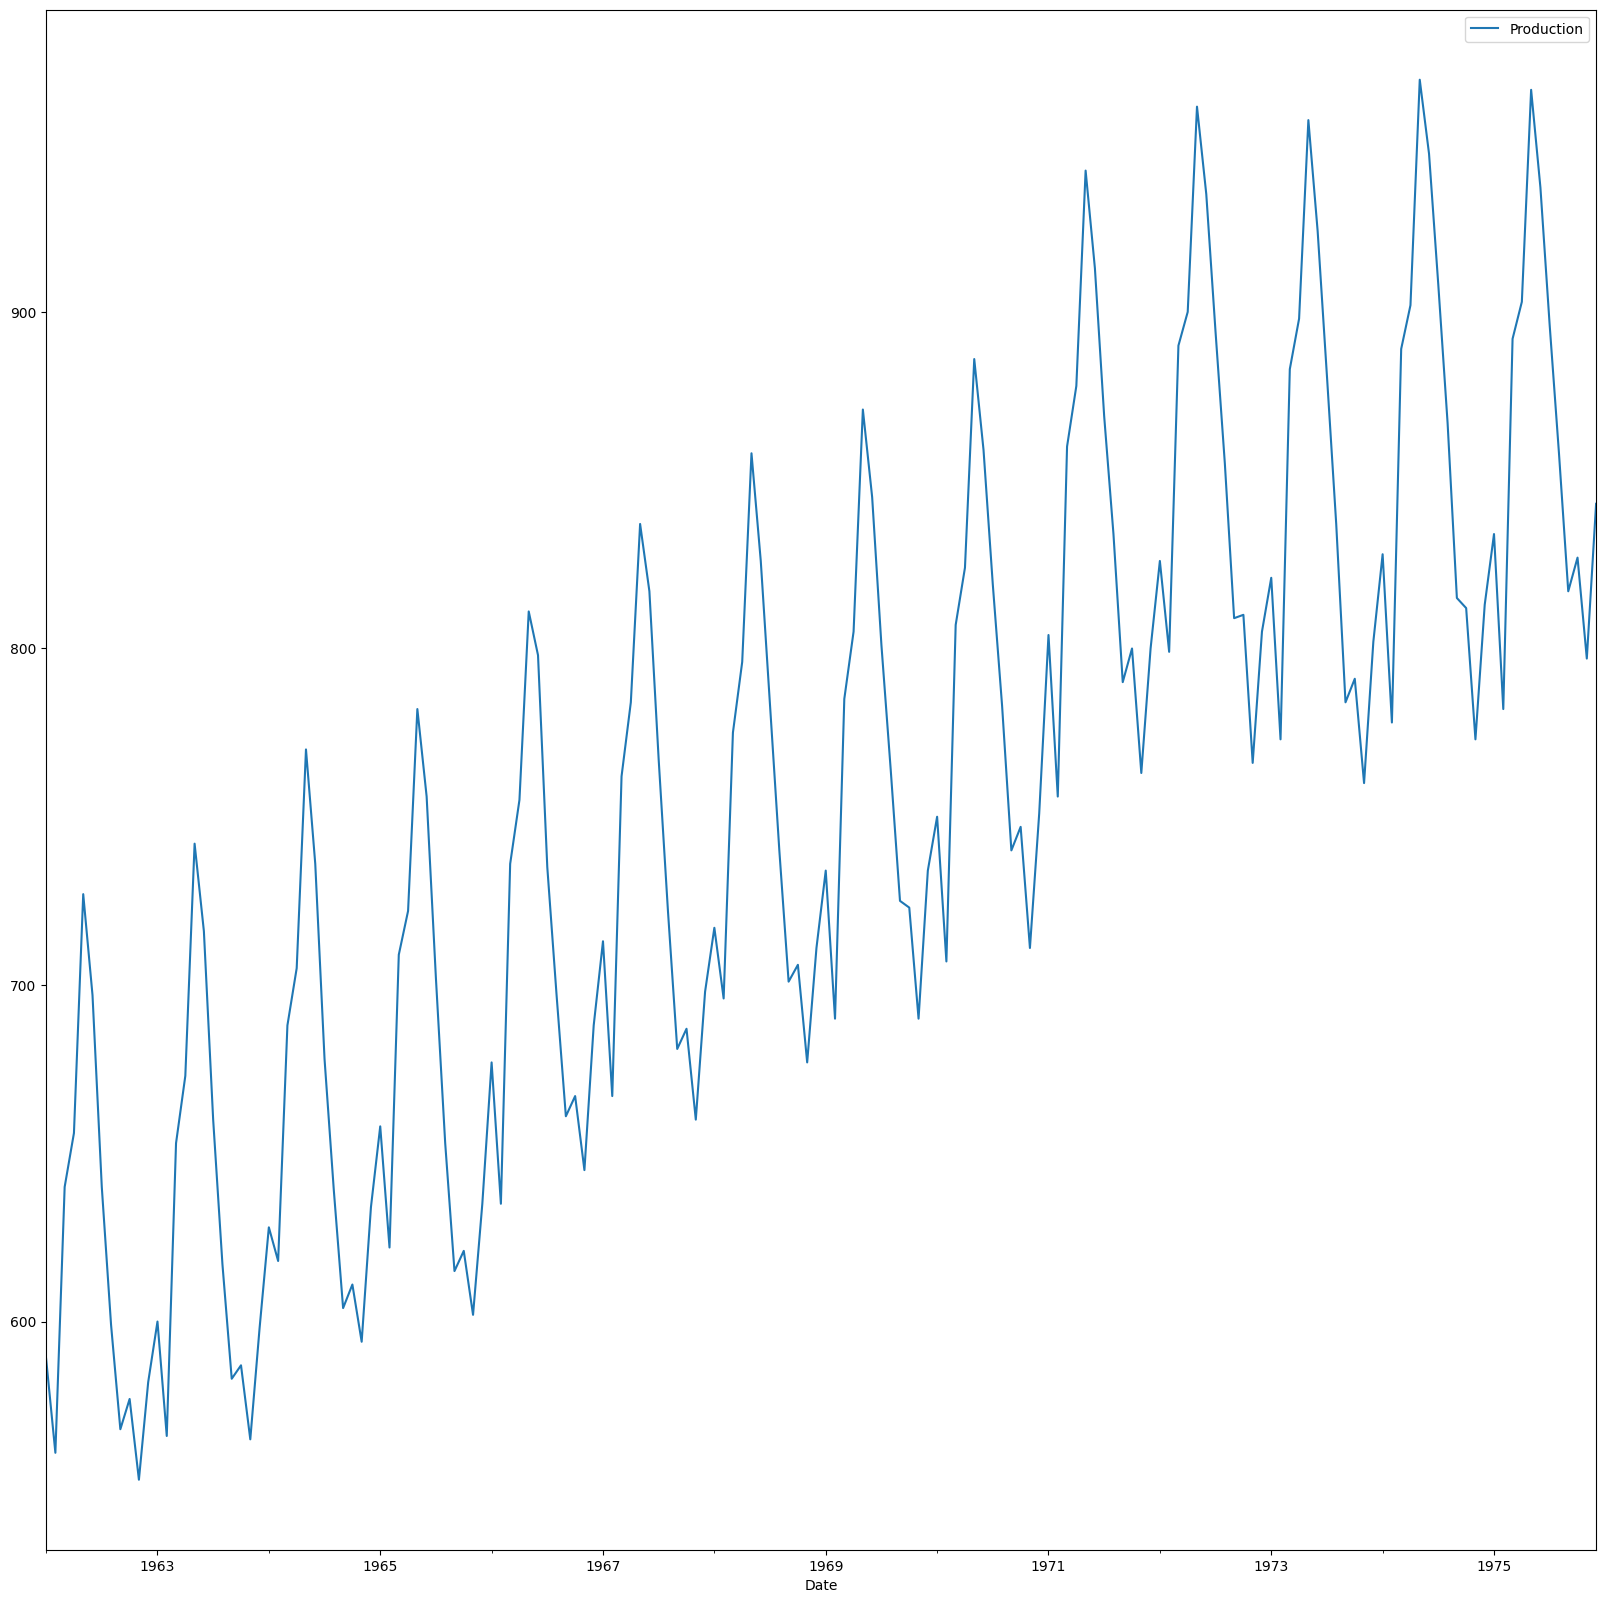

In [7]:
data.plot(figsize=(20,20))

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

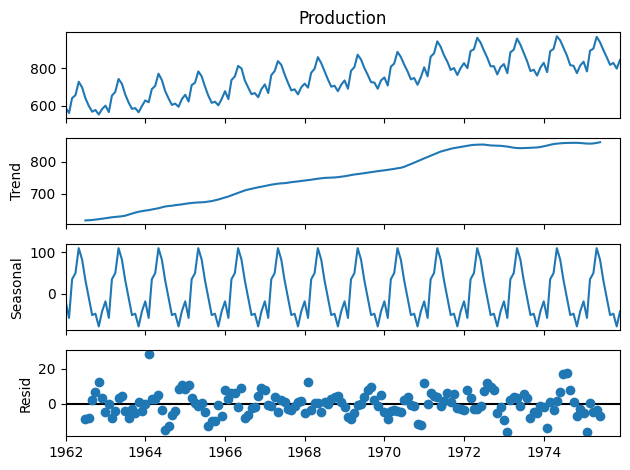

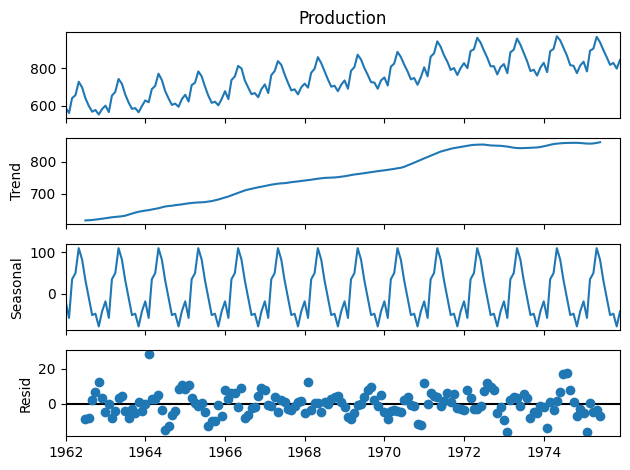

In [11]:
results = seasonal_decompose(data['Production'])
results.plot()

--> Initially we will take the data just as it is

In [12]:
len(data)

168

In [13]:
train1 = data.iloc[:156]
test1 = data.iloc[156:]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
scaler.fit(train1)
scaled_train1 = scaler.transform(train1)
scaled_test1 = scaler.transform(test1)

In [49]:
scaled_train1[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [50]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.18.0


In [51]:
import keras
print("Keras Version:", keras.__version__)

Keras Version: 3.7.0


In [52]:
# Basically used to create lags

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [53]:
len(scaled_test1)

12

In [54]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train1, scaled_train1, length=n_input, batch_size=1)

In [55]:
generator[1]

(array([[[0.01923077],
         [0.20913462],
         [0.24759615]]]),
 array([[0.41826923]]))

In [56]:
X, Y = generator[0]
print(f'Given Array: \n{X.flatten()}')
print(f'Predict this: \n{Y}')

Given Array: 
[0.08653846 0.01923077 0.20913462]
Predict this: 
[[0.24759615]]


In [57]:
X.shape

(1, 3, 1)

In [59]:
# Now we build the actual model for 12 months

n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train1, scaled_train1, length=n_input, batch_size=1)

In [61]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [70]:
model1= Sequential([
    LSTM(100, activation='relu', input_shape=(n_input, n_features)),
    Dense(1)
])

C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
model1.compile(optimizer='adam', loss='mse')

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model1.fit(generator, epochs=50)

Epoch 1/50


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0701
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0230
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0227
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035


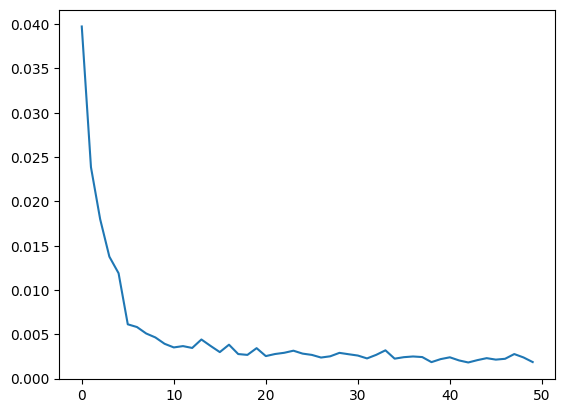

In [73]:
loss_per_epoch = model1.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [74]:
last_train_batch = scaled_train1[-12:]

In [75]:
last_train_batch =last_train_batch.reshape((1, n_input, n_features))

model1.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


array([[0.6398087]], dtype=float32)

In [76]:
scaled_test1[0]

array([0.67548077])

In [78]:
test1_predictions = []

first_eval_batch = scaled_train1[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test1)):

    current_pred1 = model1.predict(current_batch)[0]

    test1_predictions.append(current_pred1)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred1]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [79]:
test1_predictions

[array([0.6398087], dtype=float32),
 array([0.595872], dtype=float32),
 array([0.78478014], dtype=float32),
 array([0.8487416], dtype=float32),
 array([0.9758189], dtype=float32),
 array([0.95042235], dtype=float32),
 array([0.87091386], dtype=float32),
 array([0.7679226], dtype=float32),
 array([0.6551401], dtype=float32),
 array([0.6221816], dtype=float32),
 array([0.5651201], dtype=float32),
 array([0.6127056], dtype=float32)]

In [80]:
test1

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [81]:
true1_predictions =scaler.inverse_transform(test1_predictions)

In [82]:
test1['Predictions'] = true1_predictions

C:\Users\Malhar.Pandya\AppData\Local\Temp\ipykernel_13044\2115391361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['Predictions'] = true1_predictions


In [83]:
test1

,Production,Predictions
Date,,
1975-01-01,834,819.160425
1975-02-01,782,800.882746
1975-03-01,892,879.468540
1975-04-01,903,906.076502
1975-05-01,966,958.940651
1975-06-01,937,948.375696
1975-07-01,896,915.300167
1975-08-01,858,872.455793
1975-09-01,817,825.538282


<Axes: xlabel='Date'>

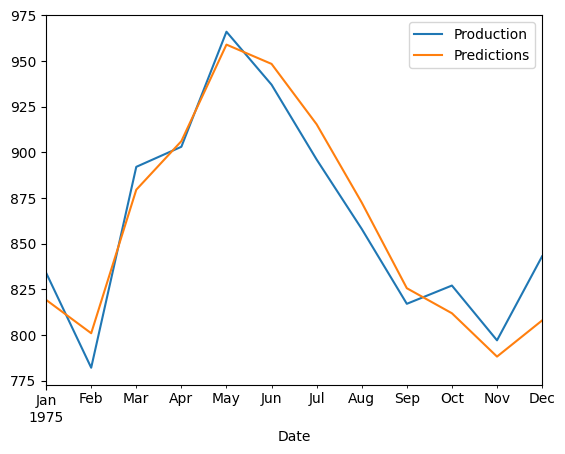

In [84]:
test1.plot()

In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse1 = mean_squared_error(test1['Production'], test1['Predictions'])
rmse1 = sqrt(mse1)

print(mse1, rmse1)

259.95846328888507 16.12322744641671
